In [ ]:
!pip3 install yandex-images-download
!pip3 install scikit-learn
!pip3 install opencv-python
!pip3 install tqdm
!pip3 install matplotlib

In [4]:
!mkdir -p ./data
!wget https://chromedriver.storage.googleapis.com/100.0.4896.60/chromedriver_linux64.zip
!unzip chromedriver_linux64.zip
!rm chromedriver_linux64.zip

--2022-05-08 21:00:34--  https://chromedriver.storage.googleapis.com/100.0.4896.60/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 74.125.205.128, 2a00:1450:4010:c0b::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|74.125.205.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6986125 (6,7M) [application/zip]
Saving to: ‘chromedriver_linux64.zip’

chromedriver_linux6 100%[===================>]   6,66M  14,6MB/s    in 0,5s    

2022-05-08 21:00:35 (14,6 MB/s) - ‘chromedriver_linux64.zip’ saved [6986125/6986125]

Archive:  chromedriver_linux64.zip
  inflating: chromedriver            


In [5]:
!yandex-images-download Chrome -k "случайное изображение" -l 200 --driver-path=./chromedriver -o ./data/

Output directory is set to "data/"
Limit of images is set to 200
  Found 50 pages of случайное изображение.
  Scrapping page 1/7...
    Downloaded the image. ==> data/случайное изображение/photo-19.jpg
    Downloaded the image. ==> data/случайное изображение/1522618347_05.jpg
    fail: https://a.d-cd.net/e83e1f2s-960.jpg error: img_url response is not ok. response: <Response [402]>.
    Downloaded the image. ==> data/случайное изображение/1517252669_ulichnye-sovpadeniya-2.jpg
    Downloaded the image. ==> data/случайное изображение/807733_main.jpg
    Downloaded the image. ==> data/случайное изображение/1621871060_porcija-interesnyh-i-pozitivnyh-kartino.jpg
    Downloaded the image. ==> data/случайное изображение/mceclip6_n68o3MK.jpg
    Downloaded the image. ==> data/случайное изображение/16551d990c3abaae02c153fbe0964fc5.jpg
    Downloaded the image. ==> data/случайное изображение/9fb6a5e4fac4a2ce16748abd0b2ad2d4.jpg
    Downloaded the image. ==> data/случайное изображение/scale_1200.

    Downloaded the image. ==> data/случайное изображение/4157.jpg
    Downloaded the image. ==> data/случайное изображение/pri23.jpg
    Downloaded the image. ==> data/случайное изображение/2a0772_c0134a84a04143f6a78554aa08f789e2~mv2_d_4470.jpg
    Downloaded the image. ==> data/случайное изображение/8.jpg
    Downloaded the image. ==> data/случайное изображение/scale_1200 (3).jpg
    Downloaded the image. ==> data/случайное изображение/1395513730_631839769.jpg
    fail: https://os1.i.ua/3/1/3374422_f881a38f.jpg error: <class 'requests.exceptions.SSLError'>
    Downloaded the image. ==> data/случайное изображение/1526311673_sluchaynye-foto-1.jpg
    Downloaded the image. ==> data/случайное изображение/2a0772_dc0bfa4207ee4099ba13364c1e0371ed~mv2.jpg
    Downloaded the image. ==> data/случайное изображение/2a0772_86cf02ce61f84dd5ba2e94f8ae0781ec~mv2_d_4710.jpg
    fail: https://a.d-cd.net/c43e1f2s-960.jpg error: img_url response is not ok. response: <Response [402]>.
    Downloaded the i

    Downloaded the image. ==> data/случайное изображение/dont_believe_your_eyes_16.jpg
    Downloaded the image. ==> data/случайное изображение/1423841201_stop-kadry-3.jpg
    Downloaded the image. ==> data/случайное изображение/1587945258_27.jpg
    Downloaded the image. ==> data/случайное изображение/1427213512_sluchayno-udachnye-16.jpg
    Downloaded the image. ==> data/случайное изображение/neveroyatnie-sluchainie-foto-5.jpg
    Downloaded the image. ==> data/случайное изображение/7meKVLY.jpg
    Downloaded the image. ==> data/случайное изображение/pokazalos-27.jpg
    Downloaded the image. ==> data/случайное изображение/0_1fefb2_b8e62153_orig.jpg
    Downloaded the image. ==> data/случайное изображение/10049548.jpg
    Downloaded the image. ==> data/случайное изображение/people-street-urban-vehicle-graffiti-art-festival-.jpg
    fail: https://74foto.ru/800/600/https/galeri.uludagsozluk.com/19/jessica-alba_14245.jpg error: <class 'requests.exceptions.SSLError'>
    Downloaded the i

In [6]:
mv ./data/случайное\ изображение/ ./data/train_set/

In [1]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from shutil import copyfile
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
train_folder = './data/train_set/'

def read_image(_p: str) -> np.ndarray:
    _img = cv2.imread(_p, cv2.IMREAD_COLOR)
    assert _img is not None, _p
    return cv2.cvtColor(_img, cv2.COLOR_BGR2RGB)


def extract_features(_img: np.ndarray) -> np.ndarray:
    gray_image = cv2.cvtColor(_img, cv2.COLOR_RGB2GRAY)
    _k = 1000.0 / max(_img.shape[:2])
    gray_image = cv2.resize(gray_image, None, fx=_k, fy=_k, interpolation=cv2.INTER_AREA)
    _sift = cv2.SIFT_create()
    _, des = _sift.detectAndCompute(gray_image, None)
    return np.array(des)


descriptors_train_base = []
for fname in tqdm(os.listdir(train_folder)):
    img_path = os.path.join(train_folder, fname)
    fname = os.path.basename(img_path)
    try:
        f = extract_features(read_image(img_path))
    except Exception as e:
        print('Skip {}, because: {}'.format(fname, e))
        
    if f.shape[1] != 128:
        print('Skip {}, because: {}'.format(fname, 'invalid features shape'))
        continue
    
    descriptors_train_base.append(f)
    
descriptors_train_base = np.concatenate(descriptors_train_base, axis=0)

100%|████████████████████████████████████████| 185/185 [00:27<00:00,  6.62it/s]


In [3]:
print(descriptors_train_base.shape)

(678327, 128)


In [ ]:
from sklearn.cluster import KMeans
import pickle

np.random.shuffle(descriptors_train_base)
train_descriptors_part = descriptors_train_base[:200000]

kmeans = KMeans(n_clusters=2048)
kmeans.fit(train_descriptors_part)

!mkdir ./data/model/
pickle.dump(kmeans, open("./data/model/bovw_cluster_model_2048.pkl", "wb"))

In [4]:
from sklearn.cluster import KMeans
import pickle

kmeans = pickle.load(
    open(
        './data/model/bovw_cluster_model_2048.pkl', 
        'rb'
    )
)

In [29]:
keywords = '\"утюг, стол, стул, собачка, кошка, человек, дорога, пейзаж, фрукты, змея, фонтан, дом, машина\"'

!yandex-images-download Chrome -k $keywords -l 20 --driver-path=./chromedriver -o ./data/database/

Output directory is set to "data/database/"
Limit of images is set to 20
  Found 50 pages of утюг.
  Scrapping page 1/1...
    Downloaded the image. ==> data/database/утюг/39a67c94e0116ee04a39fabc8e12bf4e.jpg
    Downloaded the image. ==> data/database/утюг/PIR2821AK3m_02.jpg
    Downloaded the image. ==> data/database/утюг/assets-images-catalog-household_appliances-ironing.jpg
    Downloaded the image. ==> data/database/утюг/afbef2309ca53852151266de4a538ce3.png
    fail: https://cdn.poryadok.ru/upload/iblock/07e/07e0462ba174e44d19f8ff4e2f244fc9.jpg error: img_url response is not ok. response: <Response [404]>.
    Downloaded the image. ==> data/database/утюг/31119.jpg
    Downloaded the image. ==> data/database/утюг/f3f79afd32f37792c257f25e7eeeb6c9.jpg
    Downloaded the image. ==> data/database/утюг/375824_0.jpg
    Downloaded the image. ==> data/database/утюг/orig.jpg
    fail: https://cdn.rbt.ru/images/item/image/569/568678_1193376432_d18dda573dad36acd0e86fc17b6f6bb9.jpg error: img

    Downloaded the image. ==> data/database/кошка/okras-soderzhanie-i-kormlenie-besporodnyh-koshek-i.jpg
    fail: https://kotello.ru/wp-content/uploads/2016/09/u-koshki-pojavilis-chernye-tochki-na-podborodke-jeto-bolezn-kotello.ru_.ru-002.jpg error: img_url response is not ok. response: <Response [403]>.
    Downloaded the image. ==> data/database/кошка/xishhnyj-vzglyad-domashnej-koshki.jpg
    Downloaded the image. ==> data/database/кошка/kot-vzglyad-okras-lezhit.jpg
    Downloaded the image. ==> data/database/кошка/britanskaya-korotkosherstnaya-2312.jpg
    Downloaded the image. ==> data/database/кошка/post_5db29470a99a8.jpeg
    Downloaded the image. ==> data/database/кошка/1096da2ee8eb1e8205b3d18983678649.jpe
    Downloaded the image. ==> data/database/кошка/imgpreview.jpg
All images for кошка downloaded!
  Found 37 pages of человек.
  Scrapping page 1/1...
    Downloaded the image. ==> data/database/человек/1614543508_10-p-lyudi-na-belom-fone-12.jpg
    Downloaded the image. ==> 

    Downloaded the image. ==> data/database/фрукты/scale_1200 (1).jpg
    Downloaded the image. ==> data/database/фрукты/frukty-yagody-klubnika-ezhevika-vinograd-yabloki-a.jpg
All images for фрукты downloaded!
  Found 37 pages of змея.
  Scrapping page 1/1...
    Downloaded the image. ==> data/database/змея/157031b2d4783c7c70b808.jpg
    Downloaded the image. ==> data/database/змея/narodnye-primety-o-zmeyah-19-primet-i-poverij-svya.jpg
    Downloaded the image. ==> data/database/змея/1625691948_1-kartinkin-com-p-zmeya-oboi-krasivie-1.jpg
    Downloaded the image. ==> data/database/змея/418b174e4ac5d4d67bbc8787ed6ab29f.jpeg
    Downloaded the image. ==> data/database/змея/7258c3588c630f7ef4954368e9e574df.jpg
    Downloaded the image. ==> data/database/змея/kartinki-krasivye-zmei-7.jpg
    Downloaded the image. ==> data/database/змея/snake-4180795_1280.jpg
    Downloaded the image. ==> data/database/змея/4.jpg
    Downloaded the image. ==> data/database/змея/1624333325_7-phonoteka_org-p-

In [14]:
database_path = './data/database/'

In [36]:
database_path = './data/database/'

for subfolder in tqdm(os.listdir(database_path)):
    subpath = os.path.join(database_path, subfolder)
    for image_name in os.listdir(subpath):
        image_path = os.path.join(subpath, image_name)
        if image_name.endswith('.gif'):
            os.remove(image_path)
            continue
        
        copyfile(
            image_path,
            os.path.join(
                database_path,
                '{}_{}'.format(subfolder, image_name)
            )
        )
        os.remove(image_path)
        
    os.removedirs(subpath)

100%|███████████████████████████████████████████| 11/11 [00:00<00:00, 97.65it/s]


In [38]:
for img_name in tqdm(os.listdir(database_path)):
    image_path = os.path.join(database_path, img_name)
    try:
        read_image(image_path)
    except:
        os.remove(image_path)
        print('{} removed'.format(image_path))


 23%|█████████▌                                | 61/267 [00:01<00:04, 47.58it/s]

./data/database/дорога_человек_a62b319cb813a25453f2d3d886c1c24f.jpg removed



 73%|██████████████████████████████           | 196/267 [00:05<00:01, 48.01it/s]libpng warning: iCCP: known incorrect sRGB profile

100%|█████████████████████████████████████████| 267/267 [00:06<00:00, 39.64it/s]


In [15]:
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    histogram = np.histogram(
        cluster_result, bins=[_q for _q in range(len(cluster_alg.cluster_centers_) + 1)], 
        density=True
    )
    return histogram[0]


base_paths = [os.path.join(database_path, img_name) for img_name in os.listdir(database_path)]
base_vectors = [
    build_histogram(
        extract_features(read_image(img_path)),
        kmeans
    )
    for img_path in tqdm(base_paths)
]

100%|████████████████████████████████████████| 266/266 [00:36<00:00,  7.36it/s]


--2022-05-09 02:43:17--  https://meb-biz.ru/upload/iblock/52b/52bbed27ef909de635792effdce0967c.jpg
Resolving meb-biz.ru (meb-biz.ru)... 95.213.186.140
Connecting to meb-biz.ru (meb-biz.ru)|95.213.186.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43672 (43K) [image/jpeg]
Saving to: ‘./data/chair.jpg’

./data/chair.jpg    100%[===================>]  42,65K  --.-KB/s    in 0,04s   

2022-05-09 02:43:17 (1,04 MB/s) - ‘./data/chair.jpg’ saved [43672/43672]

[[0.48266534 0.48649385 0.53691522 0.55398969 0.56723695]]


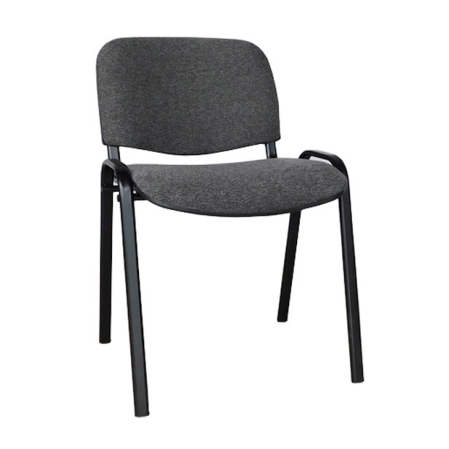

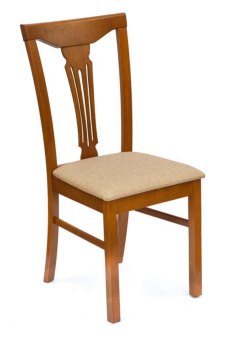

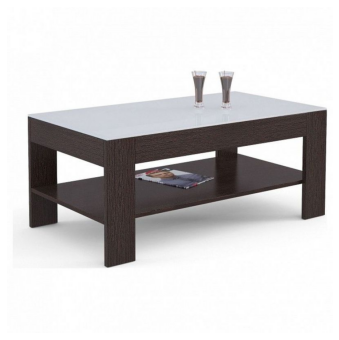

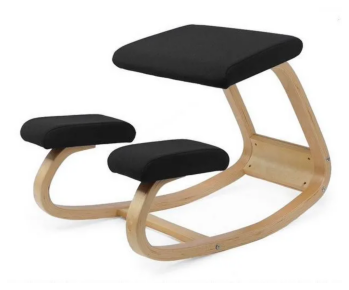

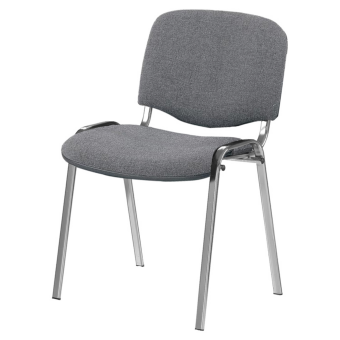

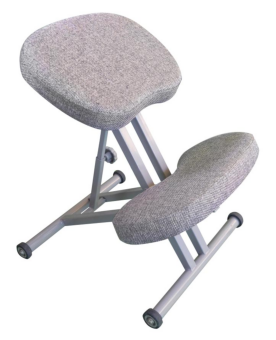

In [70]:
from sklearn.neighbors import NearestNeighbors

def find_in_base(base_vecs, _img: np.ndarray, _kmeans, top_k: int = 5) -> list:
    _f = extract_features(_img)
    _h = build_histogram(_f, _kmeans)
    
    neighbor = NearestNeighbors(
        n_neighbors=top_k, 
        metric='cosine',
        algorithm='auto',
    )
    neighbor.fit(base_vecs)
    dist, result = neighbor.kneighbors([_h])
    print(dist)
    return result[0]

!wget https://meb-biz.ru/upload/iblock/52b/52bbed27ef909de635792effdce0967c.jpg -O ./data/chair.jpg

input_image = read_image('./data/chair.jpg')
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(input_image)

for base_image_id in find_in_base(base_vectors, input_image, kmeans):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(read_image(base_paths[base_image_id]))

plt.show()

--2022-05-09 02:43:19--  https://cdnn.1prime.ru/images/83410/76/834107661.jpg
Resolving cdnn.1prime.ru (cdnn.1prime.ru)... 212.193.152.33, 212.193.157.81, 212.193.157.82
Connecting to cdnn.1prime.ru (cdnn.1prime.ru)|212.193.152.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 715930 (699K) [image/jpeg]
Saving to: ‘./data/cat.jpg’

./data/cat.jpg      100%[===================>] 699,15K  --.-KB/s    in 0,09s   

2022-05-09 02:43:20 (7,45 MB/s) - ‘./data/cat.jpg’ saved [715930/715930]

[[0.27644681 0.30132586 0.30804827 0.33244981 0.3339406 ]]


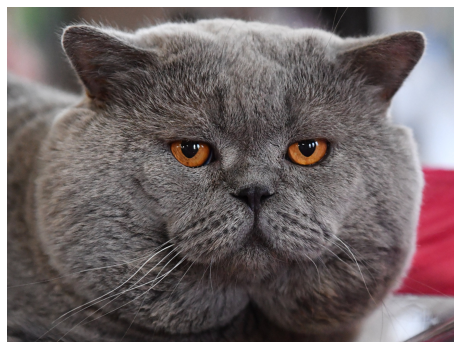

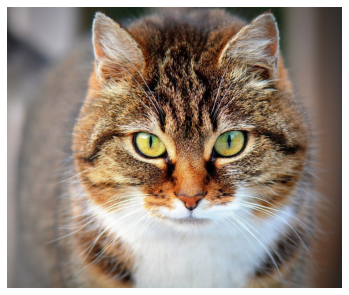

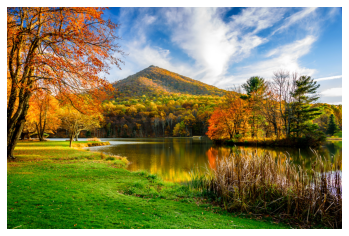

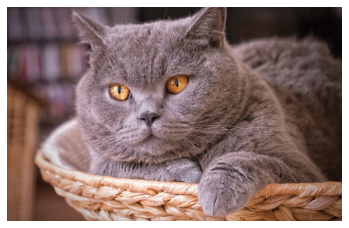

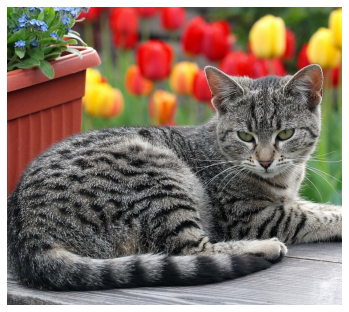

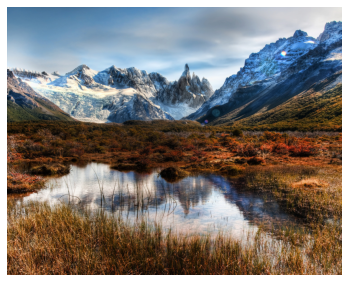

In [71]:
!wget https://cdnn.1prime.ru/images/83410/76/834107661.jpg -O ./data/cat.jpg

input_image = read_image('./data/cat.jpg')
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(input_image)

for base_image_id in find_in_base(base_vectors, input_image, kmeans):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(read_image(base_paths[base_image_id]))

plt.show()

In [41]:
# !pip3 install torch torhvision

import torch
import torchvision
from torchvision.models.resnet import resnet18
from PIL import Image

net = resnet18(pretrained=True)
net = torch.nn.Sequential(*list(net.children())[:-1])
preprocess = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def model_inference(_img: np.ndarray) -> np.ndarray:
    input_tensor = preprocess(Image.fromarray(_img).convert('RGB')).unsqueeze(0)
    out = net(input_tensor).detach()[0].view(-1).numpy()
    return out


base_net_vectors = [
    model_inference(read_image(img_path))
    for img_path in tqdm(base_paths)
]







  0%|                                                  | 0/266 [00:00<?, ?it/s]





  1%|▍                                         | 3/266 [00:00<00:08, 29.25it/s]





  3%|█                                         | 7/266 [00:00<00:07, 33.01it/s]





  4%|█▋                                       | 11/266 [00:00<00:09, 25.57it/s]





  5%|██▏                                      | 14/266 [00:00<00:11, 22.61it/s]





  7%|██▊                                      | 18/266 [00:00<00:10, 24.47it/s]





  8%|███▏                                     | 21/266 [00:00<00:09, 24.83it/s]





  9%|███▋                                     | 24/266 [00:01<00:15, 15.85it/s]





 11%|████▎                                    | 28/266 [00:01<00:12, 18.99it/s]





 12%|████▉                                    | 32/266 [00:01<00:10, 22.58it/s]





 14%|█████▋                                   | 37/266 [00:01<00:08, 27.61it/s]





 15%|██████▎                                  | 41/266 [00:

[[1.1321963 1.1471186 1.1777948 1.1832495 1.1923324]]
[[1.1596742 1.1648386 1.182773  1.1843767 1.1945722]]


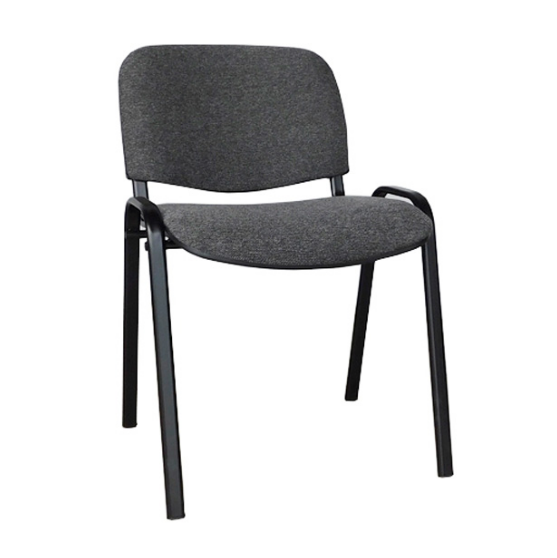

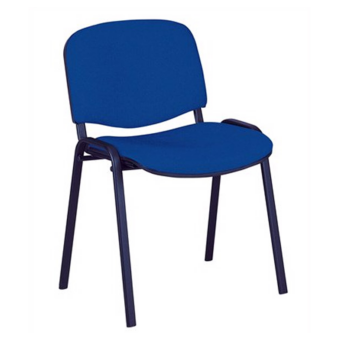

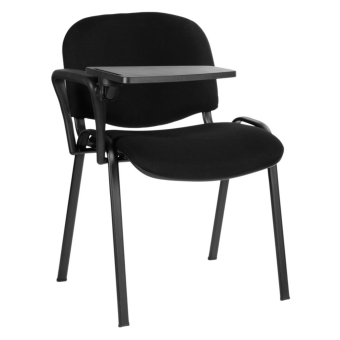

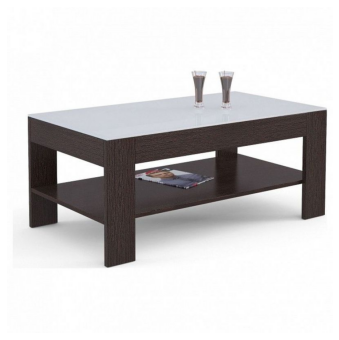

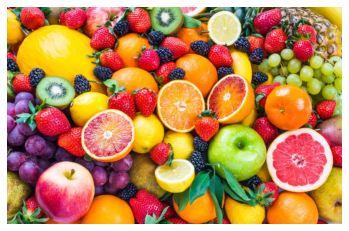

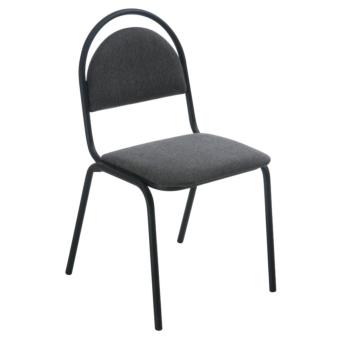

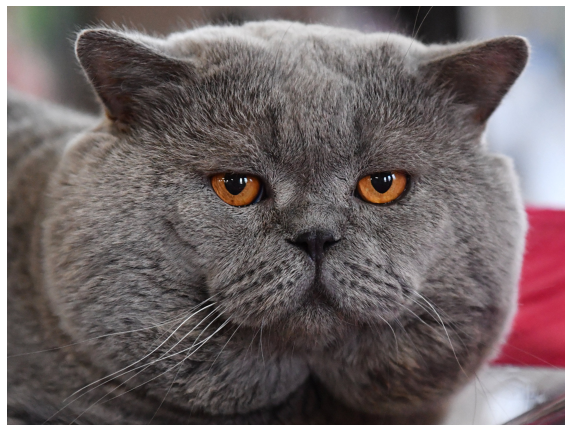

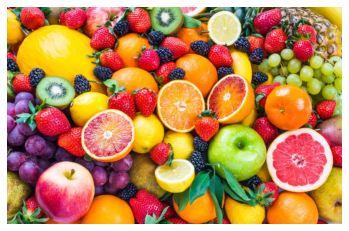

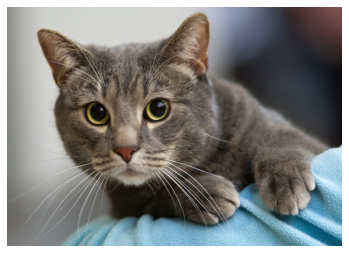

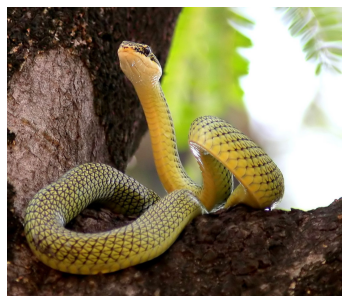

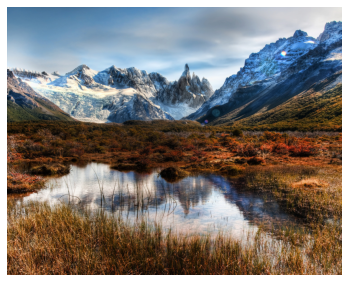

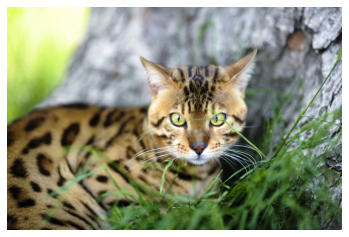

In [82]:
def find_in_net_base(base_vecs, _img: np.ndarray, top_k: int = 5) -> list:
    _h = model_inference(_img)
    
    neighbor = NearestNeighbors(
        n_neighbors=top_k,
        metric='l2',
        algorithm='auto'
    )
    neighbor.fit(base_vecs)
    dist, result = neighbor.kneighbors([_h])
    print(dist)
    return result[0]



input_image = read_image('./data/chair.jpg')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(input_image)

for base_image_id in find_in_net_base(base_net_vectors, input_image):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(read_image(base_paths[base_image_id]))
    
    
input_image = read_image('./data/cat.jpg')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(input_image)

for base_image_id in find_in_net_base(base_net_vectors, input_image):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(read_image(base_paths[base_image_id]))
    
    
plt.show()